In [14]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import plotly.graph_objs as go
import plotly.express as px

In [15]:
df = pd.read_csv("titas.csv")

In [16]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


survival - Survival (0 = No; 1 = Yes)
class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
name - Name
sex - Sex
age - Age
sibsp - Number of Siblings/Spouses Aboard
parch - Number of Parents/Children Aboard
ticket - Ticket Number
fare - Passenger Fare
cabin - Cabin
embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [18]:
homem_ = df[df["Sex"]=="male"]
mulher_ = df[df["Sex"]=="female"]

In [19]:
mulher_survived = mulher_.Survived.value_counts()
mulhers=np.where(mulher_survived.index==0,"Dead","Survived")

homem_survived = homem_.Survived.value_counts()
homenss=np.where(homem_survived.index==0,"Dead","Survived")


In [20]:
mulher = go.Bar(x=mulhers,
              y=mulher_survived.values,
              marker={"color":"purple"},
              name="Female",
              hovertemplate="Amount: %{y}")

homem = go.Bar(x=homenss,
              y=homem_survived.values,
              marker={"color":"midnightblue"},
              name="Male",
              hovertemplate="Amount: %{y}")

layout = go.Layout(title="Proportion of Gender",
                  xaxis={"title":"Dead Or Alive"},
                  yaxis={"title":"Count"})

fig = go.Figure(data=[mulher,homem], layout=layout)
fig.update_layout(
    font=dict(family='Droid-Serif', size=16))
fig.show()

In [21]:
mais_pobres = df.sort_values("Fare",ascending=True)[:80]
mais_pobres.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


In [22]:
mais_ricos = df.sort_values("Fare",ascending=False)[:80]
mais_ricos.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S


In [23]:
ratio_pobres = mais_pobres.Survived.value_counts(normalize=True).sort_values(ascending=True)
ratio_ricos = mais_ricos.Survived.value_counts(normalize=True).sort_values(ascending=False)

In [24]:
ricos = go.Bar(x=ratio_ricos.index,
              y=ratio_ricos.values,
              marker={"color":"darkslategrey"},
              name="Rich",
              hovertemplate="Percentage %{y:.3f}%")

pobres = go.Bar(x=ratio_pobres.index,
              y=ratio_pobres.values,
              marker={"color":"rosybrown"},
              name="Poor",
              hovertemplate="Percentage %{y:.3f}%")

layout = go.Layout(title="Gender and Survivability",
                  xaxis={"title":"Sobreviveu ou Morreu"},
                  yaxis={"title":"Proporção de cada Classe"})

fig = go.Figure(data=[ricos,pobres], layout=layout)
fig.update_layout(
    font=dict(family='Droid-Serif', size=16))
fig.show()

In [25]:
mais_ricos["Financial"] = "Rich"
mais_pobres["Financial"] = "Poor"

In [26]:
ricos_ = go.Box(x=mais_ricos["Financial"],
              y=mais_ricos["Fare"],
              marker={"color":"darkred"},
              name="Ricos",
              hovertemplate="Percentage %{y:.3f}%")

pobres_ = go.Box(x=mais_pobres["Financial"],
              y=mais_pobres["Fare"],
              marker={"color":"salmon"},
              name="Pobres",
              hovertemplate="Percentage %{y:.3f}%")

layout = go.Layout(title="Sexo e Sobrevivencia",
                  xaxis={"title":"Financial Situation"},
                  yaxis={"title":"Proporção de cada Classe"})

fig = go.Figure(data=[ricos_,pobres_], layout=layout)
fig.update_layout(
    font=dict(family='Droid-Serif', size=16))
fig.show()

In [27]:
df_droped_NaN_cabin = df.dropna(axis=0, subset=['Cabin'])

In [28]:
A_cabin = df_droped_NaN_cabin[df_droped_NaN_cabin["Cabin"].str.contains("A")]
B_cabin = df_droped_NaN_cabin[df_droped_NaN_cabin["Cabin"].str.contains("B")]
C_cabin = df_droped_NaN_cabin[df_droped_NaN_cabin["Cabin"].str.contains("C")]
D_cabin = df_droped_NaN_cabin[df_droped_NaN_cabin["Cabin"].str.contains("D")]
E_cabin = df_droped_NaN_cabin[df_droped_NaN_cabin["Cabin"].str.contains("E")]

In [29]:
A_cabins_Fare = np.floor(A_cabin["Fare"].mean())
B_cabins_Fare= np.floor(B_cabin["Fare"].mean())
C_cabins_Fare= np.floor(C_cabin["Fare"].mean())
D_cabins_Fare= np.floor(D_cabin["Fare"].mean())
E_cabins_Fare = np.floor(E_cabin["Fare"].mean())

In [30]:
print(f"Financial mean of A cabins {A_cabins_Fare}")
print(f"Financial mean of B cabins {B_cabins_Fare}")
print(f"Financial mean of C cabins {C_cabins_Fare}")
print(f"Financial mean of D cabins {D_cabins_Fare}")
print(f"Financial mean of E cabins {E_cabins_Fare}")

#Which sector of cabins has the highest Fare?

Financial mean of A cabins 39.0
Financial mean of B cabins 113.0
Financial mean of C cabins 100.0
Financial mean of D cabins 57.0
Financial mean of E cabins 45.0


In [31]:
A_cabin["Situation"] = "A_Cabins"
B_cabin["Situation"] = "B_Cabins"
C_cabin["Situation"] = "C_Cabins"
D_cabin["Situation"] = "D_Cabins"
E_cabin["Situation"] = "E_Cabins"



C:\Users\User\AppData\Local\Temp\ipykernel_7128\2783479986.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\User\AppData\Local\Temp\ipykernel_7128\2783479986.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\User\AppData\Local\Temp\ipykernel_7128\2783479986.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [32]:
A = go.Bar(x=A_cabin["Situation"],
              y=np.array(A_cabin["Fare"].mean()),
              marker={"color":"indigo"},
              name="A Cabins",
              hovertemplate="Percentage %{y:.3f}%")

B = go.Bar(x=B_cabin["Situation"],
              y=np.array(B_cabin["Fare"].mean()),
              marker={"color":"purple"},
              name="B Cabins",
              hovertemplate="Percentage %{y:.3f}%")

C = go.Bar(x=C_cabin["Situation"],
              y=np.array(C_cabin["Fare"].mean()),
              marker={"color":"darkorchid"},
              name="C Cabins",
              hovertemplate="Percentage %{y:.3f}%")

D = go.Bar(x=D_cabin["Situation"],
              y=np.array(D_cabin["Fare"].mean()),
              marker={"color":"orchid"},
              name="D Cabins",
              hovertemplate="Percentage %{y:.3f}%")

E = go.Bar(x=E_cabin["Situation"],
              y=np.array(E_cabin["Fare"].mean()),
              marker={"color":"blueviolet"},
              name="E Cabins",
              hovertemplate="Percentage %{y:.3f}%")

layout = go.Layout(title="Cabins and Fare",
                  xaxis={"title":"Type of Cabin"},
                  yaxis={"title":"Fare"})

fig = go.Figure(data=[A,B,C,D,E], layout=layout)

fig.show()

In [33]:
df = df.drop(columns=["Name","Ticket","Cabin","PassengerId"])

In [34]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [35]:
X = df[["Pclass","Sex","Age","SibSp","Parch","Embarked"]]
y = df["Survived"]

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.25)

In [38]:
media_id = np.floor(X_train.loc[~X_train["Age"].isna(),"Age"].mean())
X_train.loc[X_train["Age"].isna(),"Age"] = media_id

In [39]:
X_test.loc[X_test["Age"].isna(),"Age"] = media_id
#With the mean found using the X_Train set, we fill the NaN values in the X_test set. ##USING THE *SAME* MEAN

In [40]:
import category_encoders as ce

In [41]:
##Encoding Categorical Features
cat_features_ = ["Pclass", "Sex","Embarked"]
num_features_ = ["Age", "SibSp", "Parch"]

In [42]:
encoder = ce.OneHotEncoder(cols=cat_features_)

In [43]:
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [44]:
import xgboost as xgb
from sklearn.linear_model import LogisticRegression

In [45]:
models = []
models.append(("xgb",xgb.XGBClassifier()))
models.append(("reg",LogisticRegression()))

In [46]:
from sklearn.model_selection import StratifiedKFold

In [47]:
results = dict()

for  name, model in models:
    skf = StratifiedKFold(n_splits = 5, random_state=None)
    cv_results = cross_val_score(model,X_train,y_train,cv=skf, scoring="f1")
    results[name]= (cv_results.mean(), cv_results.std())
print("name     results.mean     results.std")

for key,value in results.items():
    print(key,value)

name     results.mean     results.std
xgb (0.7194734143488892, 0.05545709100918225)
reg (0.7103523873202466, 0.05644208486198368)


G:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

G:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

G:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460:

In [48]:
best_model = xgb.XGBClassifier()

In [49]:
best_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [50]:
y_pred = best_model.predict(X_test)

In [51]:
from sklearn.metrics import accuracy_score

print("Acurácia: " + str(accuracy_score(y_test, y_pred)))  # acertos ao todo

from sklearn.metrics import f1_score

print(
    "F1 Score: {}".format(f1_score(y_test, y_pred))
)

Acurácia: 0.7937219730941704
F1 Score: 0.7356321839080459


In [52]:
from sklearn.metrics import confusion_matrix
print("Matriz de Confusão : \n" + str(confusion_matrix(y_test, y_pred)))


Matriz de Confusão : 
[[113  21]
 [ 25  64]]


In [53]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Positive: " + str(tp))
print("True Negative: " + str(tn))
print("False Positive: " + str(fp))
print("False Negative: " + str(fn))


True Positive: 64
True Negative: 113
False Positive: 21
False Negative: 25


In [54]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

# probabilidades
# probs = clf_RF.predict_proba(X_test)

y_scores = cross_val_predict(best_model, X_test, y_test)

# obtem fpr, tpr e limites
fpr, tpr, thresholds = roc_curve(y_test, y_scores)


def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

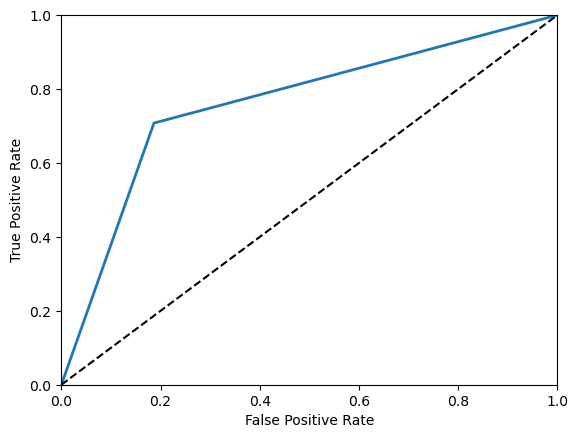

In [55]:
plot_roc_curve(fpr, tpr)
